In [31]:
%load_ext autoreload  
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Import the Data class from the ocpy library to handle observational data.
from ocpy.data import Data

# Read the dataset from the "ny_vir.xlsx" Excel file.
# The file is expected to contain columns for Time (BJD), O-C values, and Errors.
data = Data.from_file("ny_vir.xlsx")

# Calculate weights for the observations based on their errors (1/sigma^2).
data = data.calculate_weights()

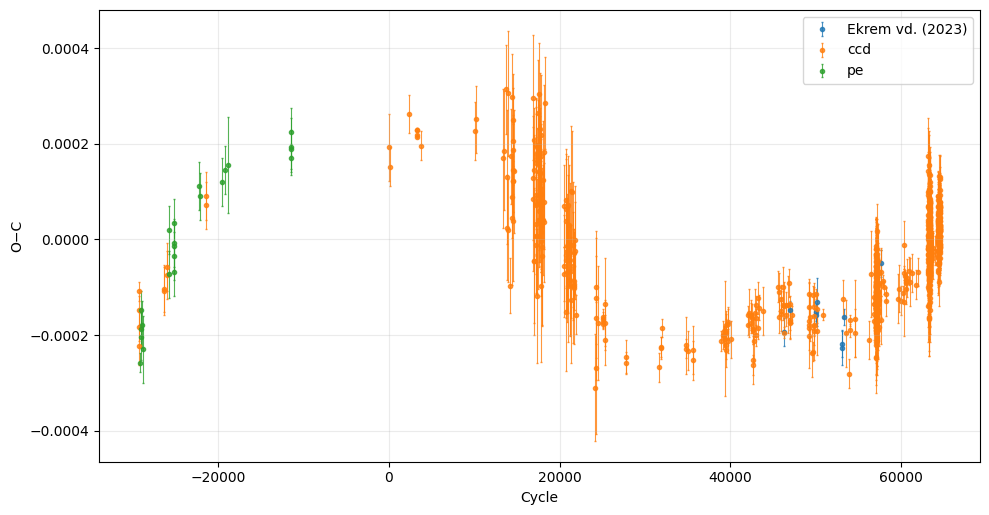

In [33]:
from ocpy.oc import Linear, Parameter, Quadratic, Keplerian
oc = data.calculate_oc(reference_minimum=2453174.442769, reference_period=0.101015969)
oc = oc[oc["labels"] != "vis"]

# 2) Linear model (y = a*x + b), initial values defined using Parameter dataclass
lin = Linear(
    a = Parameter(value=0.0, fixed=False),
    b = Parameter(value=0.0, fixed=False),
)
quad = Quadratic(
    q = Parameter(value=0.0, fixed=False),
)
lite1 = Keplerian(
    P = Parameter(value=80000, fixed=False),
    T0= Parameter(value=60000, fixed=False),
    amp = Parameter(value=0.0002, fixed=False),
    e = Parameter(value=0.0, fixed=True),
    omega = Parameter(value=0.0, fixed=True),
)
lite2 = Keplerian(
    P = Parameter(value=40000, fixed=False),
    T0 = Parameter(value=20000, fixed=False),
    amp = Parameter(value=0.00005, fixed=False),
    e = Parameter(value=0.0, fixed=True),
    omega = Parameter(value=0.0, fixed=True),
)

# Plot the individual components of the model against the data.
oc.plot()


In [34]:
# Fit the defined models (Linear, Quadratic, 2 Keplerians) to the O-C data.
res = oc.fit([lin, quad, lite1, lite2])  


(<Axes: ylabel='O−C'>, <Axes: xlabel='Cycle', ylabel='Resid'>)

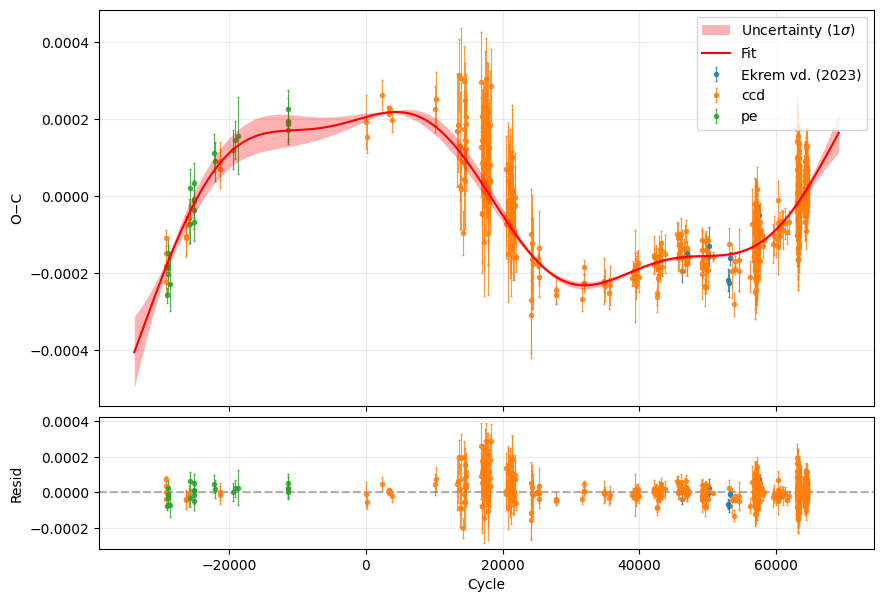

In [36]:
oc.plot(model=res)